# Descubriendo Python por Ejemplos

Python es un lenguaje muy potente en la resolución y abstracción de problemas y mediante `pip` el cuál es un instalador de módulos y librerías compartidas en la comunidad, podemos usar miles de códigos y soluciones para poder resolver nuestros problemas. 

Vamos a comenzar por listar algunos problemas a los que nos enfrentamos en la programación del día a día.

* Descargar el contenido de una URL
* Consumir un Servicio Web
* Extraer información de archivos de texto
* Reconocer patrones en textos
* Uso y comparación de fechas y horas
* Manejo de archivos de excel
* Manejo de tablas SQL, consultar e insertar
* Cómputo de columnas en tablas
* Generar reportes PDF y gráficas
* Proveer un servicio web (APIs, archivos)
* Crear procesos (trabajos o workers) 
* Ejecutar procesos en hilos
* Procesar vectores y matrices de grandes volúmenes
* Procesar imágenes, audio, video, etc.
* Simular procesos (usuarios, eventos, situaciones)
* Bases de datos No Relaciones (mongo y json)
* Crear un servidor web
* Módulo de operaciones

En la siguiente lista se muestran algunas librerías útiles muy comunes en Python.

* `requests`, `beatufil soup (bs4)`
* `json`
* `regular expression (re)`
* `NLTK`
* `datetime`, `date`, `time`
* ISO, tuplas, diccionarios
* `pandas (read_excel, to_csv, write_excel)`
* `pandas (sql, to_sql)`
* `pandas (DataFrames, query, map)`
* `matplotlib`, `seaborn`, `pdflab`
* `django`, `bottle`, `flask`
* Funciones, `threading`
* `numpy`
* `pillow (PIL)`
* `SymPy (simular eventos, usuarios, transacciones)`
* `MongoClient`, `Mongoose`

## 1. Descargar el contenido de una URL

In [4]:
# Importación canónica
import requests

url = "https://www.sympy.org/en/index.html"

# 1. Obtener la respuesta de una petición a la URL
response = requests.get(url)

# 2. Comprobar si la petición pudo realizarse (http status code 200)
if response.status_code == 200:
    # Imprimimos los primeros 500 caractéres del texto de respuesta
    print(response.text[:500])


<!DOCTYPE html>
<html lang="en">
  <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1" />
    <title>SymPy</title>
    <link href="//netdna.bootstrapcdn.com/font-awesome/3.2.1/css/font-awesome.css" rel="stylesheet" type="text/css" />
    <!-- <link rel="stylesheet" href="/static/css/base.css" type="text/css" media="screen" /> -->
    <!-- <link rel="stylesheet" id="current-theme


### Descargar una imagen de una url

In [8]:
import requests

# 1. Obtenemos la respuesta de la peteción
response = requests.get("https://www.sympy.org/static/images/logo.png")

# 2. Abrir un archivo para guardar el contenido de la respuesta
# * abrir en modo escritura binaria `wb`
f = open("sesion4/output/logo.png", "wb")

# 3. Grabamos en el archivo el contenido
f.write(response.content)

# 4. Cerrar el archivo
f.close()

### Extraer información de un contenido HTTP

In [11]:
import requests
# Importación por partes (importación parcial)
from bs4 import BeautifulSoup

url = "https://www.sympy.org/en/index.html"

response = requests.get(url)

html = response.text

soup = BeautifulSoup(html, "html.parser")

links = soup.find_all("a")

titles = soup.find_all("h1")

In [12]:
links[0]

<a href="index.html"> <img alt="SymPy Logo" src="/static/images/logo.png"/> SymPy</a>

In [14]:
# Recorremos los primeros 10 enlaces (etiquetas `<a>`)
for link in links[:10]:
    # Imprime el atributo <a href="..."> y su texto contenido
    print(link.get("href"), link.text)

index.html   SymPy
index.html Main Page
features.html Features
download.html Download
https://docs.sympy.org Documentation 
support.html Support
development.html Development
roadmap.html Roadmap
donate.html Donate
https://live.sympy.org/ Online Shell 


## 2. Consumir un servicio web

In [19]:
import requests
import json

url = "https://randomuser.me/api/?results=5"

# 1. Obtener la respuesta de la petición al servicio web
# requests.post(...)
response = requests.get(url)

# 2. Recuperar la información estructurada desde el formato JSON
# a diccionarios y listas de Python
data = json.loads(response.text)

data

{'results': [{'gender': 'male',
   'name': {'title': 'Mr', 'first': 'Redwan', 'last': 'Smout'},
   'location': {'street': {'number': 9329, 'name': 'Hazendammerweg'},
    'city': 'Westendorp',
    'state': 'Zeeland',
    'country': 'Netherlands',
    'postcode': 14717,
    'coordinates': {'latitude': '38.2040', 'longitude': '-73.4773'},
    'timezone': {'offset': '+9:30', 'description': 'Adelaide, Darwin'}},
   'email': 'redwan.smout@example.com',
   'login': {'uuid': 'baeeaed0-6f20-45f9-a472-c6b7ac88c23c',
    'username': 'lazycat831',
    'password': 'contortionist',
    'salt': 'x9kdw0Jz',
    'md5': '6e1ae5cb127bb0e804cf53694db09427',
    'sha1': '2e652556e34558297abf1f41bea279650f085ef7',
    'sha256': '196a51a19c6b6258f9d76af44495a20db60510151472c100f44b61694b33bd38'},
   'dob': {'date': '1966-10-23T10:20:11.948Z', 'age': 54},
   'registered': {'date': '2014-10-01T16:45:28.282Z', 'age': 6},
   'phone': '(675)-571-2736',
   'cell': '(662)-393-8906',
   'id': {'name': 'BSN', 'value'

In [21]:
data["results"][1]["name"]["first"]

'Tara'

In [22]:
data["results"][1]["email"]

'tara.wheeler@example.com'

In [23]:
data["results"][1]["picture"]

{'large': 'https://randomuser.me/api/portraits/women/84.jpg',
 'medium': 'https://randomuser.me/api/portraits/med/women/84.jpg',
 'thumbnail': 'https://randomuser.me/api/portraits/thumb/women/84.jpg'}

In [24]:
import requests

url = data["results"][1]["picture"]["large"]

response = requests.get(url)

f = open("sesion4/output/tara.png", "wb")

f.write(response.content)

f.close()

**Ejercicio:** Consumir el API de randomuser.me para obtener 10 usuarios y almacenar las imágenes grandes de cada usuario usando el nombre del usuario y la extensión *.png* (Tara.png) para el usuario con nombre Tara.

## 3. Extraer información de archivos de texto

In [4]:
# 1. Abrir el archivo
f = open("sesion4/input/sample-syslog.txt")

# 2. Leer el contenido del archivo
content = f.read()

# 3. Cerrar el archivo y liberar el cursos (desbloquear)
f.close()

# Monstrar los primeros 500 caracteres
content[:500]

'Jan  9 11:03:59 localhost.localdomain  GPFS MONITOR[19385]: ys3565: state: active => unknown rdma: true => null verbs_ports: 1 => null\nJan  9 11:03:59 localhost.localdomain  GPFS MONITOR[19385]: ys3565: gpfsmond run error: mmgetstate HEADER line not found\nJan  9 11:05:59 localhost.localdomain  GPFS MONITOR[19385]: ys3835: state: active => unknown rdma: true => null verbs_ports: 1 => null\nJan  9 11:05:59 localhost.localdomain  GPFS MONITOR[19385]: ys3835: glade_u: mounted, stale, remount disabled'

In [6]:
# Cortamos el contenido (el texto/string) por el separador salto de línea
lines = content.split("\n")

# Mostrar las primeras 5 líneas (los primeros 5 elementos/textos de nuestra línea)
lines[:5]

['Jan  9 11:03:59 localhost.localdomain  GPFS MONITOR[19385]: ys3565: state: active => unknown rdma: true => null verbs_ports: 1 => null',
 'Jan  9 11:03:59 localhost.localdomain  GPFS MONITOR[19385]: ys3565: gpfsmond run error: mmgetstate HEADER line not found',
 'Jan  9 11:05:59 localhost.localdomain  GPFS MONITOR[19385]: ys3835: state: active => unknown rdma: true => null verbs_ports: 1 => null',
 'Jan  9 11:05:59 localhost.localdomain  GPFS MONITOR[19385]: ys3835: glade_u: mounted, stale, remount disabled',
 'Jan  9 11:05:59 localhost.localdomain  GPFS MONITOR[19385]: ys3835: glade_p: mounted, stale, remount disabled']

## 4. Reconocer patrones en textos

**Expresiones Regulares**

**Nota:** Patrón de `Jan  9 11:03:59`

Patrón: COMIENZA_TEXTO TRES_CARACTERES(Mayúsculas o minúsculas) ESPACIOS(Al menos uno) DIGITOS(1 o 2) ESPACIOS(Al menos uno) DIGITOS(1 o 2) MARCADOR(:) DIGITOS(1 o 2) MARCADOR(:) DIGITOS(1 o 2) 

In [19]:
import re

pattern = r"^([A-Za-z]{3})\s+(\d{1,2})\s+(\d{1,2}):(\d{1,2}):(\d{1,2})"

for line in lines[:5]:
    match = re.search(pattern, line)
    
    print(match.group(0))
    print("·" * 40)
    print("mes:", match.group(1))
    print("día:", match.group(2))
    print("hora:", match.group(3))
    print("minuto:", match.group(4))
    print("seugndo:", match.group(5))
    dia = int(match.group(2))
    h = int(match.group(3))
    m = int(match.group(4))
    s = int(match.group(5))
    esHabil = h >= 8 and h <= 17
    esDiaPar = dia % 2 == 0
    print("Hora Hábil? ", esHabil)
    print("Día Par? ", esDiaPar)
    print("-" * 40)

Jan  9 11:03:59
········································
mes: Jan
día: 9
hora: 11
minuto: 03
seugndo: 59
Hora Hábil?  True
Día Par?  False
----------------------------------------
Jan  9 11:03:59
········································
mes: Jan
día: 9
hora: 11
minuto: 03
seugndo: 59
Hora Hábil?  True
Día Par?  False
----------------------------------------
Jan  9 11:05:59
········································
mes: Jan
día: 9
hora: 11
minuto: 05
seugndo: 59
Hora Hábil?  True
Día Par?  False
----------------------------------------
Jan  9 11:05:59
········································
mes: Jan
día: 9
hora: 11
minuto: 05
seugndo: 59
Hora Hábil?  True
Día Par?  False
----------------------------------------
Jan  9 11:05:59
········································
mes: Jan
día: 9
hora: 11
minuto: 05
seugndo: 59
Hora Hábil?  True
Día Par?  False
----------------------------------------


## 5. Comparación entre fechas

In [24]:
from datetime import datetime

# Recuperamos la fecha actual en texto con el formato ISO
now = datetime.now().isoformat()

now

'2020-12-05T10:50:41.791901'

In [30]:
# "1988-08-21T14:00:00"
birth = datetime(1988, 8, 21, 14, 0, 0).isoformat()

birth

'1988-08-21T14:00:00'

In [32]:
import re

pattern = "^(\d{4})-(\d{2})-(\d{2})T(\d{2}):(\d{2}):(\d{2})\.?(\d{3,6})?"

In [33]:
match_now = re.search(pattern, now)

match_now

<re.Match object; span=(0, 26), match='2020-12-05T10:50:41.791901'>

In [34]:
match_birth = re.search(pattern, now)

match_birth

<re.Match object; span=(0, 26), match='2020-12-05T10:50:41.791901'>

In [35]:
year_now = int(match_now.group(1))
month_now = int(match_now.group(2))
day_now = int(match_now.group(3))
hour_now = int(match_now.group(4))
minute_now = int(match_now.group(5))
second_now = int(match_now.group(6))

(year_now, month_now, day_now, hour_now, minute_now, second_now)

(2020, 12, 5, 10, 50, 41)

In [45]:
def extract_isodate(isodate):
    match = re.search("(\d{4})-(\d{2})-(\d{2})T(\d{2}):(\d{2}):(\d{2})", isodate)
    year = match.group(1)
    month = match.group(2)
    day = match.group(3)
    hour = match.group(4)
    minute = match.group(5)
    second = match.group(6)
    return (int(year), int(month), int(day), int(hour), int(minute), int(second))
    
# Calcula el tiempo transcurrido en segundos de una fecha ISO a la fecha y hora actual
def elapsed(now, isodate):
    y2, m2, d2, hh2, mm2, ss2 = extract_isodate(now)
    y1, m1, d1, hh1, mm1, ss1 = extract_isodate(isodate)
    
    date2 = datetime(y2, m2, d2, hh2, mm2, ss2)
    date1 = datetime(y1, m1, d1, hh1, mm1, ss1)
    
    print(date1, date2)
    
    return abs(date2 - date1).seconds

In [43]:
now

'2020-12-05T10:50:41.791901'

In [44]:
birth

'1988-08-21T14:00:00'

In [46]:
seconds = elapsed(now, birth)

seconds

1988-08-21 14:00:00 2020-12-05 10:50:41


75041

In [41]:
seconds / 60

1250.6833333333334

In [42]:
seconds / 60 / 60

20.844722222222224

In [ ]:
###########

Documentación de Pandas: https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html

In [49]:
# Importación por alias (seudónimo)
import pandas as pd

# 1. Leer el DataFrame (tabla)
df_municipios = pd.read_excel("sesion4/input/covid/Catalogs.xlsx", sheet_name="Catálogo MUNICIPIOS")

df_municipios.head()

,CLAVE_MUNICIPIO,MUNICIPIO,CLAVE_ENTIDAD
0,1,AGUASCALIENTES,1
1,2,ASIENTOS,1
2,3,CALVILLO,1
3,4,COSÍO,1
4,5,JESÚS MARÍA,1


In [50]:
df_entidades = pd.read_excel("sesion4/input/covid/Catalogs.xlsx", sheet_name="Catálogo de ENTIDADES")

df_entidades.head()

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA
0,1,AGUASCALIENTES,AS
1,2,BAJA CALIFORNIA,BC
2,3,BAJA CALIFORNIA SUR,BS
3,4,CAMPECHE,CC
4,5,COAHUILA DE ZARAGOZA,CL


In [64]:
X = []
Y = []

for row in df_entidades.iterrows():
    index, column = row

    municipios = df_municipios.query(f"CLAVE_ENTIDAD == {column['CLAVE_ENTIDAD']}")

    print(column["CLAVE_ENTIDAD"], column["ENTIDAD_FEDERATIVA"], len(municipios))

    X.append(column["ENTIDAD_FEDERATIVA"])
    Y.append(len(municipios))

1 AGUASCALIENTES 12
2 BAJA CALIFORNIA 6
3 BAJA CALIFORNIA SUR 6
4 CAMPECHE 12
5 COAHUILA DE ZARAGOZA 39
6 COLIMA 11
7 CHIAPAS 124
8 CHIHUAHUA 68
9 CIUDAD DE MÉXICO 17
10 DURANGO 40
11 GUANAJUATO 47
12 GUERRERO 82
13 HIDALGO 85
14 JALISCO 126
15 MÉXICO 126
16 MICHOACÁN DE OCAMPO 114
17 MORELOS 36
18 NAYARIT 21
19 NUEVO LEÓN 52
20 OAXACA 571
21 PUEBLA 218
22 QUERÉTARO 19
23 QUINTANA ROO 12
24 SAN LUIS POTOSÍ 59
25 SINALOA 19
26 SONORA 73
27 TABASCO 18
28 TAMAULIPAS 44
29 TLAXCALA 61
30 VERACRUZ DE IGNACIO DE LA LLAVE 213
31 YUCATÁN 107
32 ZACATECAS 59
36 ESTADOS UNIDOS MEXICANOS 1
97 NO APLICA 1
98 SE IGNORA 1
99 NO ESPECIFICADO 1


In [66]:
list(zip(X, Y))

[('AGUASCALIENTES', 12),
 ('BAJA CALIFORNIA', 6),
 ('BAJA CALIFORNIA SUR', 6),
 ('CAMPECHE', 12),
 ('COAHUILA DE ZARAGOZA', 39),
 ('COLIMA', 11),
 ('CHIAPAS', 124),
 ('CHIHUAHUA', 68),
 ('CIUDAD DE MÉXICO', 17),
 ('DURANGO', 40),
 ('GUANAJUATO', 47),
 ('GUERRERO', 82),
 ('HIDALGO', 85),
 ('JALISCO', 126),
 ('MÉXICO', 126),
 ('MICHOACÁN DE OCAMPO', 114),
 ('MORELOS', 36),
 ('NAYARIT', 21),
 ('NUEVO LEÓN', 52),
 ('OAXACA', 571),
 ('PUEBLA', 218),
 ('QUERÉTARO', 19),
 ('QUINTANA ROO', 12),
 ('SAN LUIS POTOSÍ', 59),
 ('SINALOA', 19),
 ('SONORA', 73),
 ('TABASCO', 18),
 ('TAMAULIPAS', 44),
 ('TLAXCALA', 61),
 ('VERACRUZ DE IGNACIO DE LA LLAVE', 213),
 ('YUCATÁN', 107),
 ('ZACATECAS', 59),
 ('ESTADOS UNIDOS MEXICANOS', 1),
 ('NO APLICA', 1),
 ('SE IGNORA', 1),
 ('NO ESPECIFICADO', 1)]

In [68]:
! pip install matplotlib

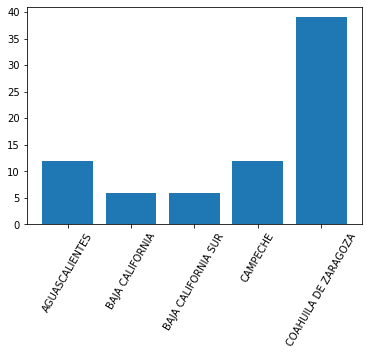

In [74]:
import matplotlib.pyplot as plt

plt.bar(X[:5], Y[:5])

plt.xticks(rotation=60)

plt.show()

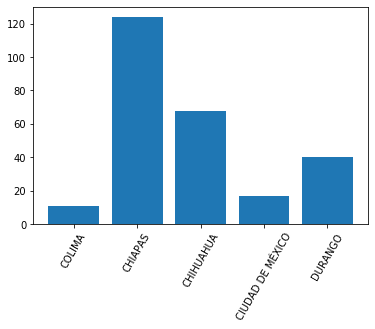

In [75]:
plt.bar(X[5:10], Y[5:10])

plt.xticks(rotation=60)

plt.show()

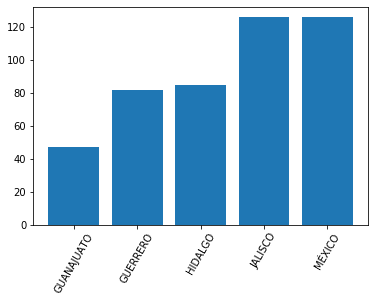

In [76]:
plt.bar(X[10:15], Y[10:15])

plt.xticks(rotation=60)

plt.show()

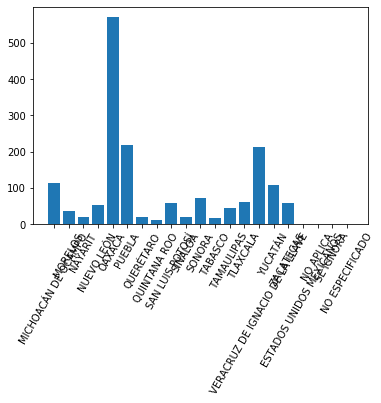

In [77]:
plt.bar(X[15:], Y[15:])

plt.xticks(rotation=60)

plt.show()

In [78]:
entidades = list(zip(X, Y))

entidades[:5]

[('AGUASCALIENTES', 12),
 ('BAJA CALIFORNIA', 6),
 ('BAJA CALIFORNIA SUR', 6),
 ('CAMPECHE', 12),
 ('COAHUILA DE ZARAGOZA', 39)]

In [81]:
entidades.sort(key=lambda t: t[1], reverse=True)

In [82]:
entidades[:5]

[('OAXACA', 571),
 ('PUEBLA', 218),
 ('VERACRUZ DE IGNACIO DE LA LLAVE', 213),
 ('JALISCO', 126),
 ('MÉXICO', 126)]

([<matplotlib.patches.Wedge at 0x7fb90d2eba20>,
 [Text(0.15381814804747457, 1.0891923509331332, 'OAXACA'),
  Text(-1.0614410637608378, -0.2886916489305872, 'PUEBLA'),
  Text(-0.2459244426818991, -1.0721572498899579, 'VERACRUZ DE IGNACIO DE LA LLAVE'),
  Text(0.642544065975577, -0.8928253598994451, 'JALISCO'),
  Text(1.0456500024538433, -0.34149095503142896, 'MÉXICO')])

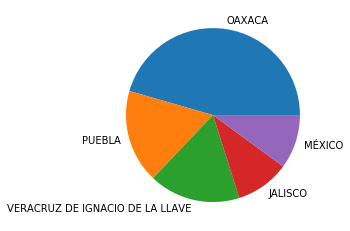

In [84]:
X, Y = zip(*entidades)

plt.pie(Y[:5], labels=X[:5])

In [87]:
import time
import threading

batches = [
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
]

def worker(i):
    # TODO: Todo lo que queramos ejecutar en el hilo
    # Podemos planificar toda la tarea
    print(f"Ejecutando lote {i}")
    batch = batches[i]
    for url in batch:
        print(f"Descargando la url {url}...")
        time.sleep(1)
     
threads = []

for index in range(len(batches)):
    t = threading.Thread(target=worker, args=(index, ))
    t.start()
    threads.append(t)
    
for t in threads:
    t.join()

Ejecutando lote 0Ejecutando lote 1

Descargando la url 6...Descargando la url 1...

Ejecutando lote 2
Descargando la url 11...
Descargando la url 7...Descargando la url 2...

Descargando la url 12...
Descargando la url 8...Descargando la url 3...

Descargando la url 13...
Descargando la url 4...Descargando la url 9...

Descargando la url 14...
Descargando la url 5...Descargando la url 10...

Descargando la url 15...


In [88]:
worker(0)

Ejecutando lote 0
Descargando la url 1...
Descargando la url 2...
Descargando la url 3...
Descargando la url 4...
Descargando la url 5...


In [89]:
for index in range(len(batches)):
    worker(index)

Ejecutando lote 0
Descargando la url 1...
Descargando la url 2...
Descargando la url 3...
Descargando la url 4...
Descargando la url 5...
Ejecutando lote 1
Descargando la url 6...
Descargando la url 7...
Descargando la url 8...
Descargando la url 9...
Descargando la url 10...
Ejecutando lote 2
Descargando la url 11...
Descargando la url 12...
Descargando la url 13...
Descargando la url 14...
Descargando la url 15...


In [94]:
from flask import Flask
import json

# 1. Definir la aplicación del servidor
app = Flask(__name__)

state = {
    "a": 123,
    "b": True
}

# 2. Marcar rutas
@app.route("/")
def home():
    return "hola"

# 2. Marcar la ruta http://localhost:port/state
@app.route("/state")
def route_state():
    return json.dumps(state)

# 3. Iniciar el servidor
app.run(port=5000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [05/Dec/2020 12:05:26] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Dec/2020 12:05:27] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [05/Dec/2020 12:05:33] "GET /state HTTP/1.1" 200 -


In [96]:
!pip install simpy

In [112]:
import simpy
import random

env = simpy.Environment()

compras = 0
factor_compra = 0.2
X = []
Y = []

# Simular cuántas compras hace un usuario en un lapso de tiempo
def compras_por_usuario(env):
    global compras
    while True:
        print("Usuario elige producto:", env.now, compras)
        X.append(env.now)
        Y.append(compras)
        # El usuario decide en 20 unidades hacer una compra
        yield env.timeout(random.randint(20, 60))
        if random.random() < factor_compra:
            print("Usuario compra:", env.now, compras)
            # El usuario concreta la compra en 5 unidades
            yield env.timeout(5)
            compras += 1
        else:
            print("Usuario no compra:", env.now, compras)
            # El usuario no concreta compra y continuamos
            yield env.timeout(1)
        
    
# Procesamos la simulación de compras
env.process(compras_por_usuario(env))

# Ejecutamos en 100 unidades de tiempo
env.run(until=1000)

Usuario elige producto: 0 0
Usuario no compra: 54 0
Usuario elige producto: 55 0
Usuario no compra: 104 0
Usuario elige producto: 105 0
Usuario no compra: 130 0
Usuario elige producto: 131 0
Usuario no compra: 173 0
Usuario elige producto: 174 0
Usuario no compra: 228 0
Usuario elige producto: 229 0
Usuario no compra: 282 0
Usuario elige producto: 283 0
Usuario no compra: 311 0
Usuario elige producto: 312 0
Usuario no compra: 365 0
Usuario elige producto: 366 0
Usuario no compra: 402 0
Usuario elige producto: 403 0
Usuario no compra: 431 0
Usuario elige producto: 432 0
Usuario compra: 452 0
Usuario elige producto: 457 1
Usuario no compra: 489 1
Usuario elige producto: 490 1
Usuario no compra: 510 1
Usuario elige producto: 511 1
Usuario no compra: 561 1
Usuario elige producto: 562 1
Usuario no compra: 585 1
Usuario elige producto: 586 1
Usuario no compra: 629 1
Usuario elige producto: 630 1
Usuario no compra: 657 1
Usuario elige producto: 658 1
Usuario no compra: 681 1
Usuario elige pro

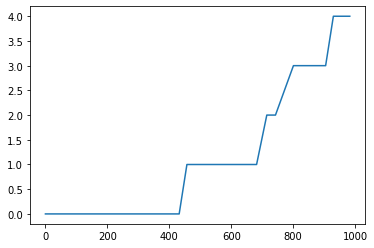

In [113]:
import matplotlib.pyplot as plt

plt.plot(X, Y)

plt.show()

In [ ]:
# Simular la compra de productos en una tienda

# Stock - Es el almacén de productos en existencia
# Product - Es el producto que se desea comprar
# Custumer - Es el cliente que compra un producto

# E1 - Checar las existencias de un producto en inventario
# E2 - Sacar N productos del almacén (venta a cliente)
# E3 - Ingresar M productos al almacén (adquisición por proveedor)
# E4 - Guardar el balance de dineros de entrada y salida

## RECESO MÁXIMO A LAS 12